# **Student's Academic Performance** 
#### *Members: Beaverly Cuasi, Allexandra Domingo, Angeline Gubat, Stephen Salamante, Ira Villanueva  (S12 - Couch Data Scientists)*
This notebook focuses on the Student's Academic Performance Dataset which can be found [here](https://www.kaggle.com/aljarah/xAPI-Edu-Datal). The first section shows the dataset information and dataset cleaning process, followed by data visualization using Exploratory Data Analysis (EDA). Lastly, this notebook aims to answer which factors affect a student’s academic grades. Specifically we wanted to know the following: <br><br>
  * Do students who participate more have higher grades than those who participate less?
  * Does parent participation and satisfaction affect a student’s performance?
  * Do the number of class absences greatly affect the student’s grades?
  * Does visiting class resources result in higher class grades?


### **Dataset Information**  
The Student's Performance Dataset is collected from Kalboard 360, a learning management, using a learner activity tracker tool called experience API (xAPI). The dataset contains **480** observations (rows) across **16** features (columns). Below is a brief description of each features:  
* **`gender`**: Student's gender <br>
* **`NationallTy`**: Student's nationality <br>
* **`PlaceofBirth`**: Student's place of birth <br>
* **`StageID`**: Educational level that student belongs to <br>
* **`GradeID`**: Grade level that student belongs to <br>
* **`SectionID`**: Classroom that student belongs to<br>
* **`Topic`**: Course topic <br>
* **`Semester`**: Current semester in a school year <br>
* **`Relation`**: Parent who is responsible for a student<br>
* **`raisedhands`**: Total number of times a student raises his/her hand  <br>
* **`VisITedResources`**: Total number of times a student visited a course content <br>
* **`AnnouncementsView`**: Total number of times a student checks the announcements <br>
* **`Discussion`**: Total number of times a student participates on discussion groups <br>
* **`ParentAnsweringSurvey`**: If a parent answered surveys provided by the school <br>
* **`ParentSchoolSatisfaction`**: If a parent is satisfied or not <br>
* **`StudentAbsenceDays`**: Total number of days that a student is absent <br>
* **`Class`**: Represents the interval of a student total grade <br>
  * <i>Low</i>: interval includes values from 0 to 69
  * <i>Middle</i>: interval includes values from 70 to 89
  * <i>High</i>: interval includes values from 90-100

Let's view the observations and features of the dataset. But first, let's import the needed libraries for this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Using `read_csv`, we will be loading the dataset (xAPI-Edu-Data.csv) into a dataframe.

In [2]:
url = 'https://raw.githubusercontent.com/okaystephen/DATASCI-MCO/main/xAPI-Edu-Data.csv'
spd_df = pd.read_csv(url)  

# First 5 rows in the dataset:
spd_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Let's see now its general information using `info()` function.

In [3]:
# Dataset's variables type:
spd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
spd_df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

We can see that there are no null values or missing values in any columns so there will be no problem in the dataset in handling null or NaN values. Before analyzing our data, let's further explore the dataset for data cleaning.  

### **Data Cleaning** 

#### **Renaming feature names**  
When we viewed the information of the dataset, we saw that some column names doesn't have the same format. Some columns are all in lowercase while some letters are capitalized like `NationalITy` and `VisITedResources`. It is a good approach to rename columns to ones that can be easily recalled later on. Here are the columns that we will be renaming:  
* `NationalITy` --> `Nationality`
* `PlaceofBirth` --> `BirthPlace`
* `VisITedResources` --> `VistedResources`
* `ParentschoolSatisfaction` --> `ParentSchoolSatisfaction`
* `raisedhands` --> `RaisedHands`

In [5]:
spd_df.rename(columns={'NationalITy':'Nationality',
'PlaceofBirth': 'BirthPlace',
'gender': 'Gender',
'VisITedResources':'VisitedResources',
'ParentschoolSatisfaction':'ParentSchoolSatisfaction',
'raisedhands':'RaisedHands'}, inplace=True) 

Let's view the dataset with the renamed columns.

In [6]:
spd_df.head()

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### **Renaming Mum to Mother in Relation Column**  
It's also important to ensure that the data values is consistent and uniformed within the dataset especially inside a feature column. Let's check the `Relation` column in the dataset and view its unique values.  

In [7]:
spd_df['Relation'].unique()

array(['Father', 'Mum'], dtype=object)

For uniformity, we will be renaming Mum to Mother.

In [8]:
spd_df['Relation'].replace({'Mum':'Mother'}, inplace=True)
spd_df['Relation'].unique()

array(['Father', 'Mother'], dtype=object)

#### **Renaming countries from the `BirthPlace` column**  

Let's check the unique values in the `BirthPlace` feature

In [9]:
spd_df['BirthPlace'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

We can see there are inconsistencies with how the locations are written, and there is a misspelled location. Let's turn `lebanon` into `Lebanon`, `venzuela` to `Venezuela`, `KuwaIT` to `Kuwait`, and `Lybia` to `Libya`.

In [10]:
spd_df.replace({'BirthPlace': {'lebanon': 'Lebanon'}}, inplace=True)

In [11]:
spd_df.replace({'BirthPlace': {'venzuela': 'Venezuela'}}, inplace=True)

In [12]:
spd_df.replace({'BirthPlace': {'KuwaIT': 'Kuwait'}}, inplace=True)

In [13]:
spd_df.replace({'BirthPlace': {'Lybia': 'Libya'}}, inplace=True)

In [14]:
spd_df['BirthPlace'].unique()

array(['Kuwait', 'Lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'Venezuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Libya'], dtype=object)

In [15]:
spd_df

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


#### **Renaming countries from the `Nationality` column**  

In [16]:
spd_df['Nationality'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

Just like in the `BirthPlace` column, there are some inconsistencies and misspelled locations. Let's turn `KW` into `Kuwait`, `lebanon` to `Lebanon`, `venzuela` to `Venezuela`, and `Lybia` to `Libya`.

In [17]:
spd_df.loc[spd_df['Nationality'] == 'KW', 'Nationality'] = 'Kuwait' 

In [18]:
spd_df.loc[spd_df['Nationality'] == 'lebanon', 'Nationality'] = 'Lebanon' 

In [19]:
spd_df.loc[spd_df['Nationality'] == 'venzuela', 'Nationality'] = 'Venezuela' 

In [20]:
spd_df.loc[spd_df['Nationality'] == 'Lybia', 'Nationality'] = 'Libya' 

In [21]:
spd_df['Nationality'].unique()

array(['Kuwait', 'Lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'Venezuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Libya'], dtype=object)

In [22]:
spd_df

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### **Cleaning Inconsistent Data from `StageID`**

Let's locate the inconsistent data

In [23]:
cleaning = spd_df[['GradeID', 'StageID', 'Class']].groupby(['GradeID', 'StageID'])
cleaning.count()

Class
GradeID StageID            
G-02    lowerlevel      147
G-04    lowerlevel       48
G-05    lowerlevel        3
G-06    MiddleSchool     32
G-07    MiddleSchool    100
        lowerlevel        1
G-08    MiddleSchool    116
G-09    HighSchool        5
G-10    HighSchool        4
G-11    HighSchool       13
G-12    HighSchool       11

We see that there is an outlier G-07 data labeled as a `lowerlevel` instead of `MiddleSchool`. Let's fix that by changing the value of that cell.

In [24]:
index = spd_df[(spd_df['StageID'] == "lowerlevel") & (spd_df['GradeID'] == "G-07")].index
spd_df.loc[index]

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
32,F,Kuwait,Kuwait,lowerlevel,G-07,A,IT,F,Father,2,19,10,50,Yes,Good,Above-7,L


In [25]:
spd_df.loc[index, 'StageID'] = "MiddleSchool"
spd_df.loc[index]

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
32,F,Kuwait,Kuwait,MiddleSchool,G-07,A,IT,F,Father,2,19,10,50,Yes,Good,Above-7,L


In [26]:
cleaning2 = spd_df[['GradeID', 'StageID', 'Class']].groupby(['GradeID', 'StageID'])
cleaning2.count()

,,Class
GradeID,StageID,
G-02,lowerlevel,147
G-04,lowerlevel,48
G-05,lowerlevel,3
G-06,MiddleSchool,32
G-07,MiddleSchool,101
G-08,MiddleSchool,116
G-09,HighSchool,5
G-10,HighSchool,4
G-11,HighSchool,13


### **Exploratory Analysis**  
Now that we have cleaned our dataset, we can now proceed in analyzing our data and conduct exploratory analysis to understand the dataset further. As mentioned, we aim to know which factors affect student's academic grades specifically we want to address the following questions:  
* Do students who participate more have higher grades than those who participate less?
* Does parent participation and satisfaction affect a student’s performance?
* Do the number of class absences greatly affect the student’s grades?
* Does visiting class resources result in higher class grades?

#### ***Q1: Do students who participate more have higher grades than those who participate less?***  
Student participation has been defined as “students’ willingness, need, desire, and compulsion to participate in, and be successful in, the learning process”. 
For the first question, we wanted to know if the student actively participates then it will also result to a higher grade. With this, we will be using the following features:  
* `AnnouncementsView`: Total number of times a student checks the announcements<br>
* `Discussion`: Total number of times a student participates on discussion groups<br>
* `RaisedHands`: Total number of times a student raises his/her hand  <br>
* `Class`: Represents the interval of a student total grade <br>
  * <i>Low</i>: interval includes values from 0 to 69
  * <i>Middle</i>: interval includes values from 70 to 89
  * <i>High</i>: interval includes values from 90-100

To start, let us assign to a dataframe variable the needed features for this research question. 

In [27]:
q1_df = spd_df[["AnnouncementsView", "Discussion", "RaisedHands", "Class"]].copy()
q1_df

,AnnouncementsView,Discussion,RaisedHands,Class
0,2,20,15,M
1,3,25,20,M
2,0,30,10,L
3,5,35,30,L
4,12,50,40,M
...,...,...,...,...
475,5,8,5,L
476,14,28,50,M
477,25,29,55,M
478,14,57,30,L


Now, let's try visualizing the relationship between the variables `RaisedHands` and `Class` using a bar plot.

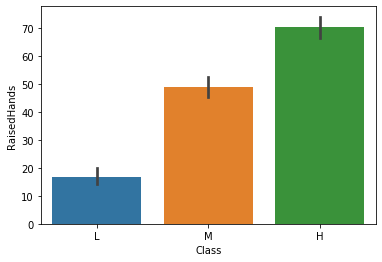

In [28]:
sns.barplot(x="Class", y="RaisedHands", order=["L", "M", "H"], data=q1_df)

We can see from the figure above that students who tend to raise their hands in class have higher grades than those students who seldomly raise hands. Let's try to visualize if this will also be the case when it comes to participation in discussion and viewing of announcements.

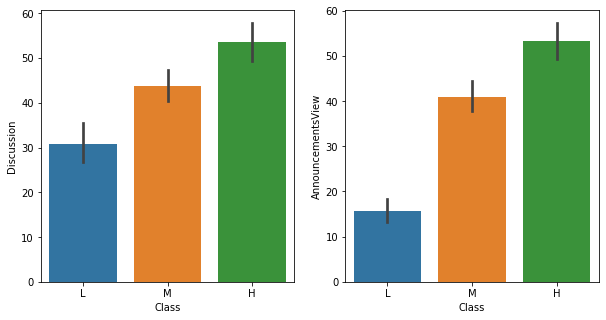

In [29]:
fig, axarr  = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Class', y='Discussion', order=['L','M','H'], data=q1_df,  ax=axarr[0])
sns.barplot(x='Class', y='AnnouncementsView', order=['L','M','H'], data=q1_df, ax=axarr[1])

Students who also participates in discussions more often as well as check announcements tend to have a better academic performance. Let's try to see the relationship of every student participation (`Discussion`, `AnnouncementsView`, `RaisedHands`) with each other and student's grade (`Class`) through scatter plots.

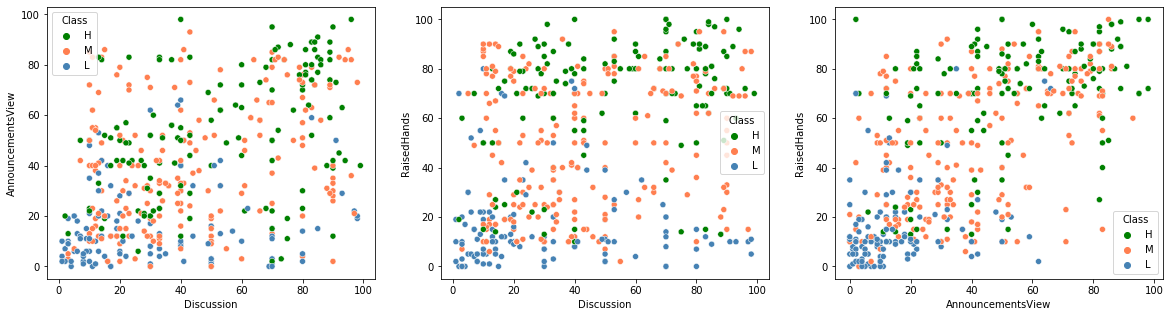

In [67]:
fig, axarr  = plt.subplots(1,3,figsize=(20,5))
color = {'L': 'steelblue', 'M': 'coral', 'H': 'green'}
sns.scatterplot(x=q1_df.Discussion, y=q1_df.AnnouncementsView, hue=q1_df["Class"], hue_order=['H','M','L'], palette=color, ax=axarr[0])
sns.scatterplot(x=q1_df.Discussion, y=q1_df.RaisedHands, hue=q1_df["Class"], hue_order=['H','M','L'], palette=color, ax=axarr[1])
sns.scatterplot(x=q1_df.AnnouncementsView, y=q1_df.RaisedHands, hue=q1_df["Class"], hue_order=['H','M','L'], palette=color, ax=axarr[2])

In the last figure, we can see how students who have low grades that don't actively raised hands tends to also not check his/her announcements. This is also showed on the second figure in which students that hardly raised hands tends to also not check his/her announcements and have lower grades. In conclusion, it is expected that students who doesn't actively participate will tend to also not to do any activities that requires student engagement and have lower grades. With this, students who have high participation when it comes to student activities are reflected as well in their academic performance and have higher grades. 

#### ***Q2: Does parent participation and satisfaction affect a student’s performance?***
In this section of the notebook, we take a look at the Parent-related features, specifically the `ParentAnsweringSurvey` which may represent the parent's engagement in the child's school activities, and `ParentSchoolSatisfaction` which may represent the parent's view on the child's school learning process.

It is hypothesized that parent participation and satisfaction are features that may affect a student's class performance or class grade. This may be proven through the percentages of the features and the p-value upon using the **chi-square test**.

The following is the general view of the target data which we wish to investigate on:

In [31]:
q2 = spd_df.groupby(["ParentAnsweringSurvey", "ParentSchoolSatisfaction"])["Class"].value_counts()
q2

ParentAnsweringSurvey  ParentSchoolSatisfaction  Class
No                     Bad                       L         79
                                                 M         57
                                                 H          9
                       Good                      M         26
                                                 L         20
                                                 H         19
Yes                    Bad                       M         23
                                                 H         15
                                                 L          5
                       Good                      M        105
                                                 H         99
                                                 L         23
Name: Class, dtype: int64

Based on the first cell of the section, all grade classes are present in each category and sub-category. 

##### General

We take a look at the values when both features are looked into at the same time.

A new column is added the the end of the dataframe called `ParticipationAndSatisfaction`

The possible values are for this column are:
- `YesGood` : The parent participated in the survey, and they are satisfied with the school's system.
- `YesBad` : The parent participated in the survey, but they are not satisfied withe the school's system.
- `NoGood` : The parent did not participate in the survey, but they are satisfied with the school's system.
- `NoBad` : The parent did not participate in the survey, and they are not satisfied with the school's system. 

In [32]:
q2 = spd_df
q2['ParticipationAndSatisfaction'] = q2['ParentAnsweringSurvey'] + q2['ParentSchoolSatisfaction']
q2

,Gender,Nationality,BirthPlace,StageID,GradeID,SectionID,Topic,Semester,Relation,RaisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class,ParticipationAndSatisfaction
0,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,YesGood
1,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,YesGood
2,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,NoBad
3,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,NoBad
4,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,NoBad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,NoBad
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,NoBad
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,NoBad
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,NoBad


The next cell shows the count of each class grade belonging in each value of `ParticipationAndSatisfaction`.

In [33]:
q2PS = spd_df.groupby('ParticipationAndSatisfaction')["Class"].value_counts()
q2PS

ParticipationAndSatisfaction  Class
NoBad                         L         79
                              M         57
                              H          9
NoGood                        M         26
                              L         20
                              H         19
YesBad                        M         23
                              H         15
                              L          5
YesGood                       M        105
                              H         99
                              L         23
Name: Class, dtype: int64

The data is turned into a dataframe and transposed for visualization

In [34]:
q2PS_df = pd.DataFrame([q2PS['NoBad'], q2PS['NoGood'], q2PS['YesBad'], q2PS['YesGood']], index = ['NoBad', 'NoGood', 'YesBad', 'YesGood'])
q2PS_df = q2PS_df.transpose()
q2PS_df

,NoBad,NoGood,YesBad,YesGood
L,79,20,5,23
M,57,26,23,105
H,9,19,15,99


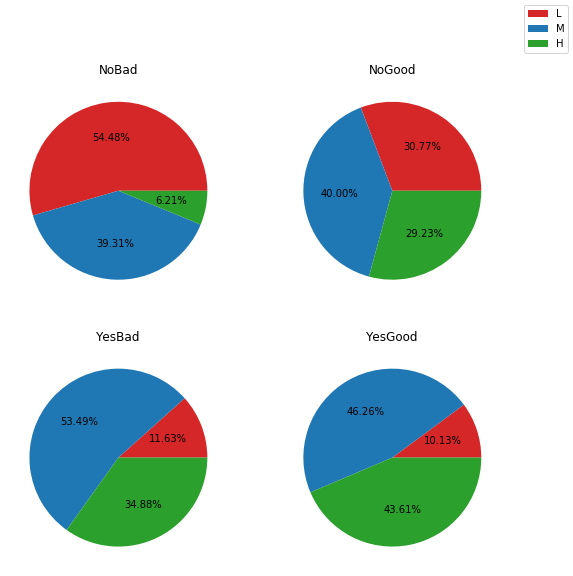

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (9,9))
for ax, col in zip(axes.flat, q2PS_df.columns):
    artists = ax.pie(q2PS_df[col], autopct='%.2f%%', colors = ['tab:red', 'tab:blue', 'tab:green'])
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], q2PS_df.index)

plt.show()

The generated data above shows a high percentage of Low class grade when a parent does not participate. The data shows that 54.48% of `NoBad` are 30.77% of `NoGood` are students who got a low class grade. `YesBad` and `YesGood` got a low percentage of Low class grades with 11.63% and 10.13% respectively. In terms of High class grades, `YesGood` got the highest percentage of 43.61% followed by `YesBad` with 34.61%.

Based on the data above, it can be inferred that participation may have a larger impact on the student's grade when compared to satisfaction. However, the absence of both participation and satisfaction greatly affects the chances that a student may have a Low class grade.

Further investigation is needed by focusing on individual features.

##### Participation

We first check the participation records.

The next cell shows the target category and the classes found in each:

In [36]:
q2_Participation = spd_df.groupby("ParentAnsweringSurvey")["Class"].value_counts()
q2_Participation

ParentAnsweringSurvey  Class
No                     L         99
                       M         83
                       H         28
Yes                    M        128
                       H        114
                       L         28
Name: Class, dtype: int64

This is turned into a dataframe for proper visualization,

In [37]:
q2P_df = pd.DataFrame([q2_Participation['No'], q2_Participation['Yes']], index = ["Not Participate", "Participate"])
q2P_df

,L,M,H
Not Participate,99,83,28
Participate,28,128,114


Based on the data shown above, a pie chart is appropriate to show what is the majority or to see the percentage of each category. We first see based on the `Class` grade category:

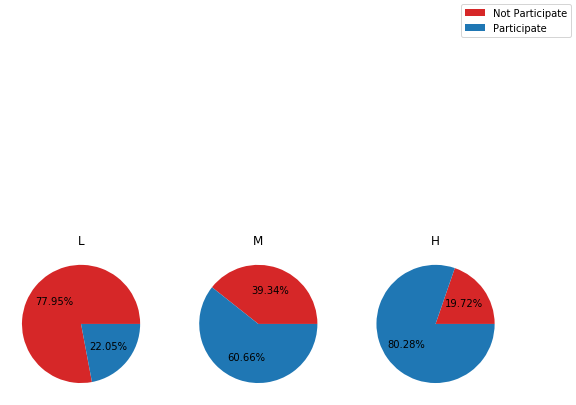

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (9,9))
for ax, col in zip(axes.flat, q2P_df.columns):
    artists = ax.pie(q2P_df[col], autopct='%.2f%%', colors = ['tab:red', 'tab:blue'])
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], q2P_df.index)

plt.show()

We see that there is a significant value for the Low and High class grades.

Looking at the data above, we can see that:
- Majority of those with low class grades have parents who do not participate.
- Majority of those with high grades have parents who do participate.

Low class grades have a value of 77.95% for the Not Participate value and the High class grade has an 80.28% for the Participate value.

The dataframe is transposed for the `Participation` category visualization.

In [39]:
q2P_df_T = q2P_df.transpose()
q2P_df_T

,Not Participate,Participate
L,99,28
M,83,128
H,28,114


The next visualization will be focused on the `Participation` category. Pie charts are also used for this visualization for the same reason stated above.

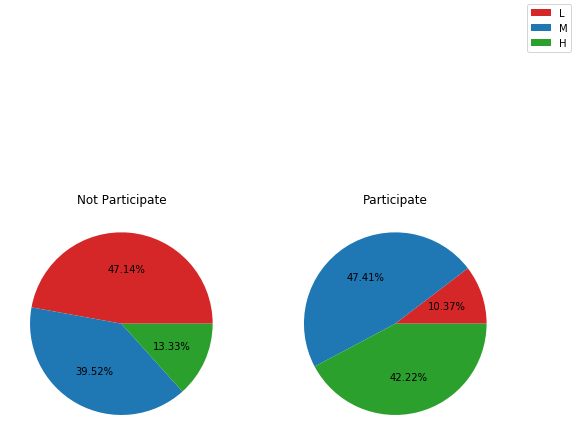

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (9,9))
for ax, col in zip(axes.flat, q2P_df_T.columns):
    artists = ax.pie(q2P_df_T[col], autopct='%.2f%%', colors = ['tab:red', 'tab:blue', 'tab:green'])
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], q2P_df_T.index)

plt.show()

Though the above data shows that the majority of those with Low grades have parents who do not participate, Low class grades does not represent the majority of the Not Participating value in the Participation category. It still, however, represents the highest percentage in the chart as it gets 47.14%. 

The same can be almost said for the Participate value. Like above, High class grade is not the majority value. It got a high value of 42.22% but it is not considered the highest in the chart as Middle Class grade recieved a value of 47.41%.

In [41]:
q2_Satisfaction = spd_df.groupby("ParentSchoolSatisfaction")["Class"].value_counts()
q2_Satisfaction

ParentSchoolSatisfaction  Class
Bad                       L         84
                          M         80
                          H         24
Good                      M        131
                          H        118
                          L         43
Name: Class, dtype: int64

##### Satisfaction

The Satisfaction category will be represented by the `ParentSatisfaction` feature. The values for this feature are `Good` and `Bad`. It is uncertain if the value for this feature was given before revealing the class grade or after. It is assumed that it is before.

The following is a view of the target feature and the count for each `Class` grade:

In [42]:
q2S_df = pd.DataFrame([q2_Satisfaction['Bad'], q2_Satisfaction['Good']], index = ["Unsatisfied", "Satisfied"])
q2S_df

,L,M,H
Unsatisfied,84,80,24
Satisfied,43,131,118


Like before, pie charts will be used to visualize the data to show the percentage of each value in the category.

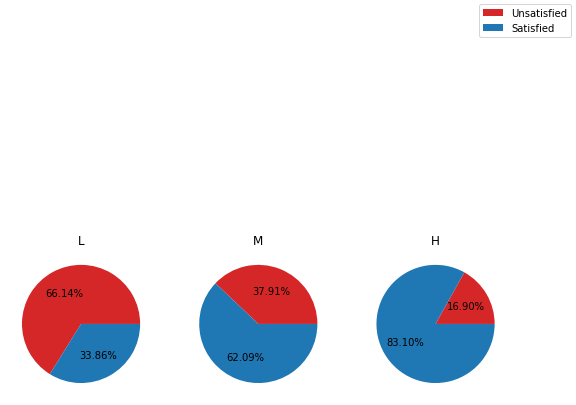

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (9,9))
for ax, col in zip(axes.flat, q2S_df.columns):
    artists = ax.pie(q2S_df[col], autopct='%.2f%%', colors = ['tab:red', 'tab:blue'])
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], q2S_df.index)

plt.show()

As hypothesized, majority of the value in the Low class grade are students who have parents expressing unsatisfaction towards the school's system. The Unsatisfied received a percentage of 66.14%. Majority of those with High class grade have parents expressing Satisfaction in the school system as Satisfied receives a score of 83.10%.

It is observed that:
- Majority of those with low class grades have parents who express unsatisfaction with the school system.
- Majority of those with high grades have parents who express satisfaction with the school system.

The data is transposed for the next visualization as it focuses now on the `Satisfaction` category.

In [44]:
q2S_df_T = q2S_df.transpose()
q2S_df_T

,Unsatisfied,Satisfied
L,84,43
M,80,131
H,24,118


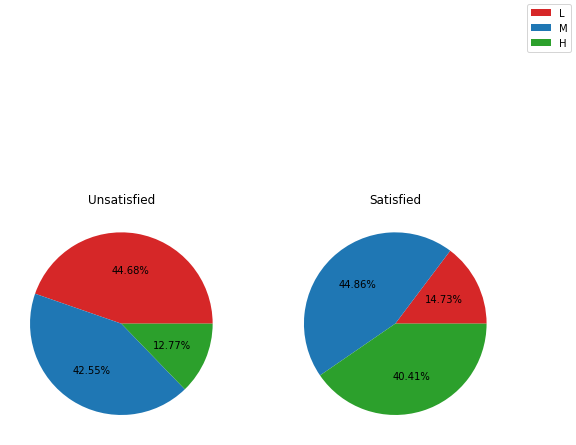

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (9,9))
for ax, col in zip(axes.flat, q2S_df_T.columns):
    artists = ax.pie(q2S_df_T[col], autopct='%.2f%%', colors = ['tab:red', 'tab:blue', 'tab:green'])
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(artists[0], q2S_df_T.index)

plt.show()

The results did not produce values that supports that immediately supports the hypothesis as a class grade value did not take up the majority of both visualization. The Unsatisfied value of the `Satisfaction` category have 44.68% of students recieveing Low class grades, this represents the highest value. The highest value for the Satisfied category is the Middle class grade value with a percentage of 44.86%. This is followed by High class grade with 40.41%.

#### Chi-square Test

Chi-square is performed to determine whether features are dependent or possibly independent. The test will be done on the separated features, `Participation` and `Satisfaction`. The hypothesis are:

- H: The feature affects the student's performance.
- H0: The feature does not affect the student's performance.

In [46]:
alpha = 0.05

##### Participation

In [47]:
c, p, dof, expected = chi2_contingency(q2P_df)
print("p value for Participation is " + str(p))
if p <= alpha:
    print("It is Dependent (reject H0)")
else:
    print("It is Independent (do not reject H0)")


p value for Participation is 1.9580757205685668e-21
It is Dependent (reject H0)


`Participation` is shown as a dependent feature which means that it could affect a student's class grades.

##### Satisfaction

In [48]:
c, p, dof, expected = chi2_contingency(q2S_df)
print("p value for Satisfaction is " + str(p)) 
if p <= alpha:
    print("It is Dependent (reject H0)")
else:
    print("It is Independent (do not reject H0)")

p value for Satisfaction is 1.3552933750373137e-15
It is Dependent (reject H0)


`Satisfaction` is shown as a dependent feature which means that it could affect a student's class grades.

It is shown through the gathered and interpreted data that a parent's school participation and their satisfaction with the school system may affect a student's class grade or class performance. The visualization shows the high percentage of High class grades on participating and satisfied parents. There is also a high percentage of Low class grades on parents who does the opposite. The chi-square test further proves their relation and rejects the null hypothesis that states that they are independent. Therefore, these features can be considered as some of the factors that affect a student's class performance.

#### ***Q3: Do the number of class absences greatly affect the grades of a student?***

We'll look at the `StudentAbsenceDays` in this portion of the notebook, which may indicate a student's grades.

The number of student absences is thought to be a factor that influences a student's grade in class. The percentages of the feature and the p-value obtained from the chi-square test can be used to demonstrate this.

The next cell displays the number of students in each class grade for each value of `StudentAbsenceDays`.

In [49]:
q3_df = spd_df.groupby("StudentAbsenceDays")["Class"].value_counts()
q3_df

StudentAbsenceDays  Class
Above-7             L        116
                    M         71
                    H          4
Under-7             M        140
                    H        138
                    L         11
Name: Class, dtype: int64

Then we will be assigning the required feature for this research question to a dataframe variable and transposed for visualization.

In [50]:
q3s_df = pd.DataFrame([q3_df['Above-7'], q3_df['Under-7']], index=["Above 7 Absences", "Below 7 Absences"])
q3s_df

,L,M,H
Above 7 Absences,116,71,4
Below 7 Absences,11,140,138


A pie chart is ideal to show what is the dominant or to examine the percentage of each class grade based on the data presented above.

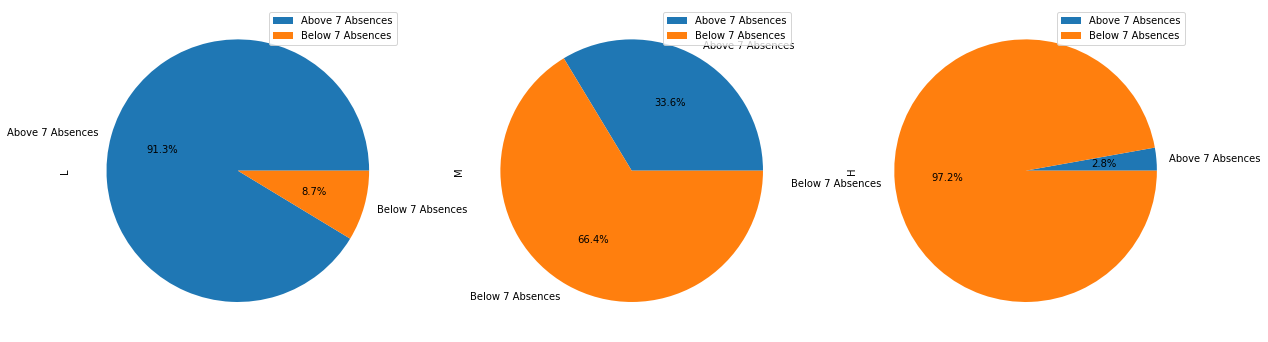

In [51]:
df2 = pd.DataFrame(q3s_df)
plot = df2.plot.pie(subplots=True, figsize=(20, 20), autopct='%1.1f%%')

When the number of student absences exceeds 7 days, the generated data reveals a significant percentage of Low class grade. There are 91.3% of students with Low class grades that are absent for more than 7 days while there are 33.6% of students that have Middle class grades and 2.8% of students with High class grades. 

On the other hand, there are only 8.7% of students that are on Low class grades, 66.4% students on Middle class grades, and 97.2% of students have High class grades with absences that are below 7 days.

As we can see, the percentage of students being on Low class grades to High class grades with above 7 days of absences are becoming smaller while if we take a look on the precentage of students being on Low class grades to High class grades with absences that are below 7 days, it is also becoming bigger. 

Given the data shown above, it can be concluded that absences greatly affect students on their class grades. 

#### Chi-square Test

Chi-square is performed to determine whether the feature `StudentAbsenceDays` are dependent or possibly independent. The hypothesis are:

- H: The feature affects the student's class grade.
- H0: The feature does not affect the student's class grade.

In [52]:
c, p, dof, expected = chi2_contingency(q3s_df)
print("p value for Absences is " + str(p))
if p <= alpha:
    print("It is Dependent (reject H0)")
else:
    print("It is Independent (do not reject H0)")


p value for Absences is 1.2513960927832126e-49
It is Dependent (reject H0)


The number of days that students have been absent is displayed as a dependent characteristic, implying that it may have an impact on a student's class grades.

The collected and evaluated data shows that student absences can influence a student's grade in class. On absences of more than 7 days, the visualization depicts a large percentage of Low class grades. On absences of less than seven days, there is also a significant percentage of High class grades.

The chi-square test confirms their relationship and disproves the null hypothesis that they are unrelated. As a result, this feature can be considered a factor that influences a student's grade in class.

#### ***Q4: Does visiting class resources result in higher class grades?***

We wanted to know if the total number of times a student visits a course content affects their academic performance. With this, we will be creatring a new dataframe by grouping the `VisitedResources` column by `Class`, then getting the mean per class.

In [53]:
q4_df = spd_df[["VisitedResources", "AnnouncementsView", "Class"]].copy()
q4_df

,VisitedResources,AnnouncementsView,Class
0,16,2,M
1,20,3,M
2,7,0,L
3,25,5,L
4,50,12,M
...,...,...,...
475,4,5,L
476,77,14,M
477,74,25,M
478,17,14,L


In [54]:
q4_mean = q4_df.groupby("Class")["VisitedResources"].mean().reset_index()
q4_mean

,Class,VisitedResources
0,H,78.746479
1,L,18.322835
2,M,60.635071


The dataframe will be then used to visualize the mean values of `VisitedResources` per `Class`.

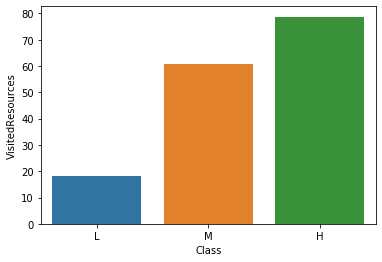

In [55]:
sns.barplot(x="Class", y="VisitedResources", order=["L", "M", "H"], data=q4_mean)

As seen from the mean values, the __High (H)__ class has the highest value when it comes to visiting course content, while the __Low (L)__ class having the lowest value. This shows that students who have high grades does visit class resources more often than students who get lower grades.

Now, let's further explore the answer for the question. Since `VisitedResources` is related to `AnnouncementsView`—in a way where an announcement can lead a student to visit a class resource. With this, let's visualize the relationship of `VisitedResources` and `AnnouncementsView` with respect to `Class` through a scatter plot.

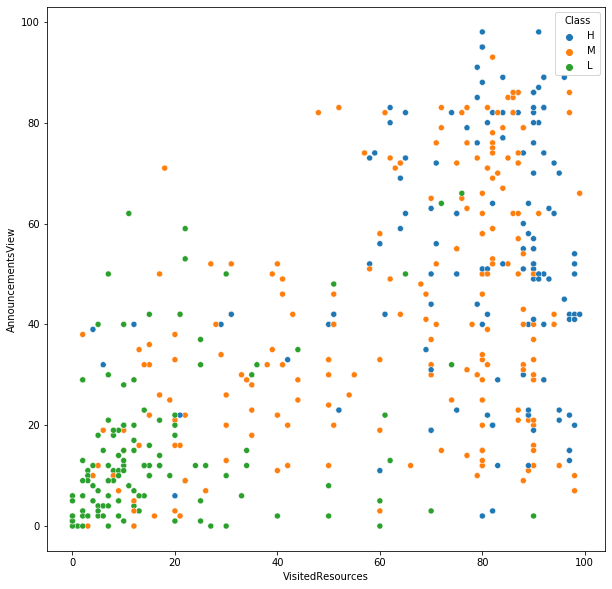

In [56]:
fig  = plt.subplots(figsize=(10,10))
sns.scatterplot(x=q4_df.VisitedResources, y=q4_df.AnnouncementsView, hue=q4_df["Class"], hue_order=['H','M','L'])


As seen on the scatter plot, students under the Low class tends to view announcements and visit class resources less often than those under the Medium and High class.

The figures above have shown that majority of students with low grades visits class resources less frequently, whereas students with high grades visit class resources more often. With these, there's a high chance for a student to have a high grade when they diligently visit their class resources in contrast to those who do less frequently.

### Conclusion
After performing data cleaning on the dataset and answering the four research questions through exploratory data analysis, the researchers conclude that:
- Students who have high participation in relation to student activities reflect well in their academic performance and get higher grades in contrast to students who do not actively participate.
- A parent's school participation and their satisfaction towards the school's system may influence their child's class grade of performance—which was furthered proved by using a chi-square test.
- Absences of students greatly affter their class grades—which was furthered proved by using a chi-square test.
- Students who visit class resources frequently tend to have higher grades than those students who visit the resources less often.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e43fe2a7-e576-49d1-b96a-1dc3b3395062' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>